<a href="https://colab.research.google.com/github/skomandooru/DS-Projects/blob/main/Correlation_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predication through Correlation & Regression

Relationships between variables is important in making predictions. If we can measure these relationship, then we can make predictions about future outcomes. 

**Correlation** measures linear association between variables in a dataset. For example, there is a correlation between acceleration and speed but not necessarily the converse. 
**Correlation coefficient (r)** measures the strength of the linear relationship between two variables.
- r is a number between -1 and 1 (The closer r is to both thresholds shows strong positive or negative correlation)
- r measures the extend to which the scatter plot clusters around a straight line

In order to measure correlation between variables, they need to be standardized as z-orders measures.

Linear regression uses the relationship across data points to draw a straight line through them. This line is the plot of the correlation coefficient against the fields being correlated.

![image.png](attachment:image.png)
**Source**: https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Descriptive-Statistics/Measures-of-Relation-Between-Variables/Correlation/index.html

**References**
- **Chapter 15**: Prediction (https://www.inferentialthinking.com/chapters/15/Prediction.html)
- **Correlation**: https://www.nbinteract.com/examples/examples_correlation.html
- **Linear Regression**: https://www.w3schools.com/python/python_ml_linear_regression.asp
- **Polynomial Regression**: https://www.w3schools.com/python/python_ml_polynomial_regression.asp

In [1]:
# to hide output of this cell
%%capture

!pip install datascience # Install the package

In [3]:
# Install all the packages from the data science module
from datascience import *
from sklearn.metrics import r2_score

# Import the Matplotlib
import matplotlib

# Sets the matplotlib render 
matplotlib.use('Agg')

# Set the outputting of plotting commands to display inline direcctly below the cell.
# Also forces the result to be stored in the notebook document.
%matplotlib inline

# Import the numpy and pylot libraries
import matplotlib.pyplot as plt
import numpy as np

# Set the pyplot plotting style.
# Reference: https://www.dataquest.io/blog/making-538-plots/
plt.style.use('fivethirtyeight')

In [4]:
census_dt = Table.read_table('https://raw.githubusercontent.com/beneze/Datasets/master/acs2017_county_data.csv')
census_dt

CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18,23.2,8.1,15.4,86,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27,89527,80.7,12.9,6.3,0.1,5.5
1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0,20269,33368,2551,17561,798,27.2,44.9,25,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22,0.4,0,0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30,8171,76,17.4,6.3,0.3,8.2
1009,Alabama,Blount County,57667,28490,29177,9,87.4,1.5,0.3,0.1,0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35,21380,83.9,11.9,4,0.1,4.9
1011,Alabama,Bullock County,10478,5616,4862,0.3,21.6,75.6,1,0.7,0,8212,29655,5376,20856,2355,28.5,50.4,19.7,17.1,18.6,14,30.6,73.1,15.7,0.3,6.2,1.7,3,29.8,4290,81.4,13.6,5,0,12.1
1013,Alabama,Butler County,20126,9416,10710,0.3,52.2,44.7,0.1,1.1,0,15459,36326,2701,19004,943,24.4,34.8,26.9,17.3,18.5,11.6,25.7,83.6,12.6,0,0.9,0.9,2,23.2,7727,79.1,15.3,5.3,0.3,7.6
1015,Alabama,Calhoun County,115527,55593,59934,3.6,72.7,20.4,0.2,1,0,88383,43686,1491,23638,793,18.6,26.6,29,17.5,23.7,10.4,19.4,85,9.2,0.2,1.3,1.1,3.2,24.8,47392,74.9,19.9,5.1,0.1,10.1
1017,Alabama,Chambers County,33895,16320,17575,2.2,56.2,39.3,0.3,1,0,26259,37342,2011,22002,1205,18.8,29.1,24.3,13.5,23,11.6,27.6,87.1,9.7,0.2,0.6,0.5,2,23.6,14527,84.5,11.8,3.7,0,6.4
1019,Alabama,Cherokee County,25855,12862,12993,1.6,91.8,5,0.5,0.1,0,20620,40041,2316,23010,1354,16.1,20,28.8,14.8,18.1,11.9,26.5,85,12.1,0.4,0.3,0.3,2,26.5,9879,74.8,17.1,8.1,0,5.3


In [5]:
# Eliminate the invalid data
poverty_dt = census_dt.select('State', 'County', 'Poverty', 'ChildPoverty').where('ChildPoverty',are.above(0))
poverty_dt

State,County,Poverty,ChildPoverty
Alabama,Autauga County,13.7,20.1
Alabama,Baldwin County,11.8,16.1
Alabama,Barbour County,27.2,44.9
Alabama,Bibb County,15.2,26.6
Alabama,Blount County,15.6,25.4
Alabama,Bullock County,28.5,50.4
Alabama,Butler County,24.4,34.8
Alabama,Calhoun County,18.6,26.6
Alabama,Chambers County,18.8,29.1
Alabama,Cherokee County,16.1,20


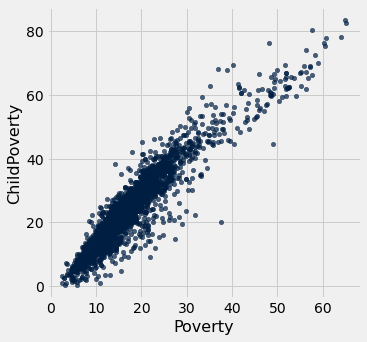

In [6]:
poverty_dt.scatter('Poverty', 'ChildPoverty')

In [7]:
def standard_units(measures):
    return (measures - np.mean(measures))/np.std(measures) 

poverty_dt_stu = Table().with_columns(
    'Poverty (standard units)',  standard_units(poverty_dt.column('Poverty')), 
    'ChildPoverty (standard units)', standard_units(poverty_dt.column('ChildPoverty'))
)

poverty_dt_stu

Poverty (standard units),ChildPoverty (standard units)
-0.373873,-0.253019
-0.602678,-0.590598
1.25185,1.83997
-0.193237,0.295547
-0.145067,0.194274
1.4084,2.30414
0.914662,0.987585
0.216204,0.295547
0.240289,0.506534
-0.0848555,-0.261458


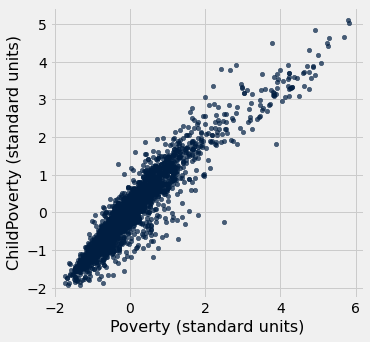

In [8]:
poverty_dt_stu.scatter('Poverty (standard units)', 'ChildPoverty (standard units)')

In [9]:
# Calculating correlation coefficient(r)
r_calculation = poverty_dt_stu.with_column('Product of standards unit', poverty_dt_stu.column(0) * poverty_dt_stu.column(1))
r_calculation

Poverty (standard units),ChildPoverty (standard units),Product of standards unit
-0.373873,-0.253019,0.0945968
-0.602678,-0.590598,0.35594
1.25185,1.83997,2.30337
-0.193237,0.295547,-0.0571107
-0.145067,0.194274,-0.0281828
1.4084,2.30414,3.24516
0.914662,0.987585,0.903307
0.216204,0.295547,0.0638986
0.240289,0.506534,0.121715
-0.0848555,-0.261458,0.0221862


In [10]:
def correlation(t, x, y):
    t.scatter(x, y)
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

0.9390956840884296

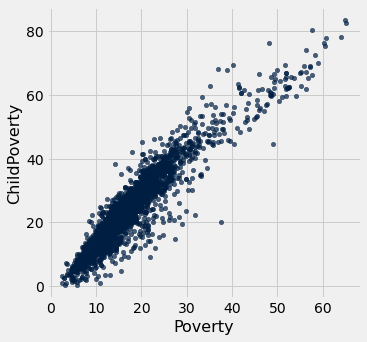

In [11]:
correlation(poverty_dt, 'Poverty', 'ChildPoverty')

-0.7645937927875179

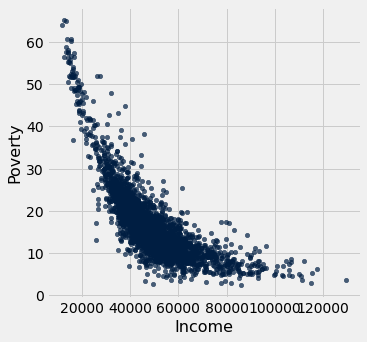

In [12]:
correlation(census_dt, 'Income', 'Poverty')

0.8900527747605812

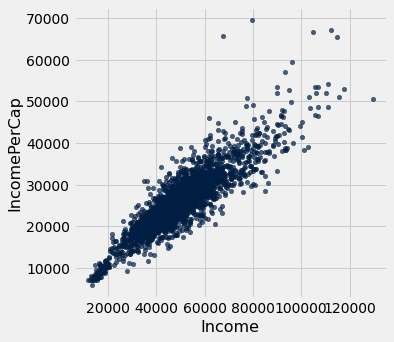

In [13]:
correlation(census_dt, 'Income', 'IncomePerCap')

### Summary on correlation
1. Correlations based on aggregates and averages like Income, IncomePerCap, are called ecological correlations. So the interpretation should be done with care since the correlation values are averages for the county.
2. Correlation can be swayed by outliers
3. Correlation only measures association not causation. For example, higher average income general means a higher income per capital. However, it doesn't mean a low income earner will not be found in a county with a high income per capital

## Linear Regression

![image.png](attachment:image.png)



![image.png](attachment:image.png)

In [14]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

def predict(t, label_x, label_y):
    slope_s = slope(t, label_x, label_y)
    intercept_s = intercept(t, label_x, label_y)
    return t.column(label_x) * slope_s + intercept_s

def predict_y_value(t, label_x, label_y, new_x_value):
    slope_s = slope(t, label_x, label_y)
    intercept_s = intercept(t, label_x, label_y)
    return new_x_value * slope_s + intercept_s

**average of y** = intercept + slope * average of x

This is our important equation for prediction. 

In [15]:
slope_income = slope(poverty_dt, 'Poverty', 'ChildPoverty')
intercept_income = intercept(poverty_dt, 'Poverty', 'ChildPoverty')

slope_income, intercept_income

(1.3400056909341551, 0.5797243596699673)

In [16]:
predicted_value = predict(poverty_dt, 'Poverty', 'ChildPoverty')
predicted_value

array([18.93780233, 16.39179151, 37.02787915, ..., 67.58000891,
       70.79602256, 68.11601118])

In [17]:
predicted_value = predict_y_value(poverty_dt, 'Poverty', 'ChildPoverty', 16.1)
predicted_value

22.153815983709865

In [18]:
regression_dt = Table().with_columns(
    'Poverty',  poverty_dt.column('Poverty'), 
    'ChildPoverty', poverty_dt.column('ChildPoverty'),
    'Prediction (ChildPoverty)', predict(poverty_dt, 'Poverty', 'ChildPoverty')
)
regression_dt


Poverty,ChildPoverty,Prediction (ChildPoverty)
13.7,20.1,18.9378
11.8,16.1,16.3918
27.2,44.9,37.0279
15.2,26.6,20.9478
15.6,25.4,21.4838
28.5,50.4,38.7699
24.4,34.8,33.2759
18.6,26.6,25.5038
18.8,29.1,25.7718
16.1,20,22.1538


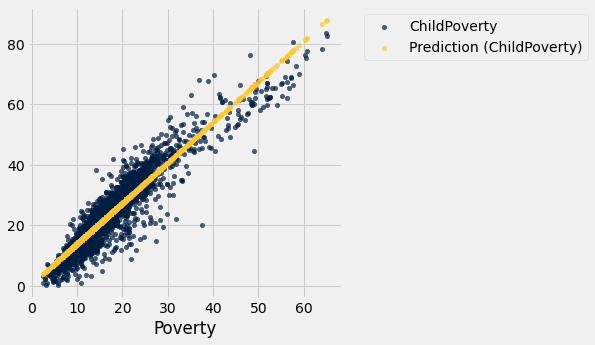

In [19]:
regression_dt.scatter('Poverty')

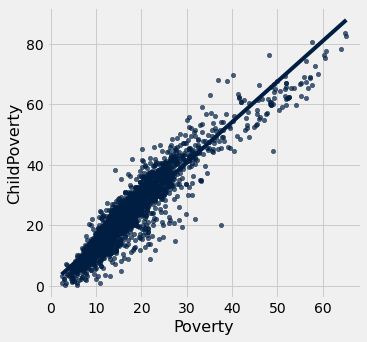

In [20]:
regression_dt.scatter('Poverty', 'ChildPoverty', fit_line=True)

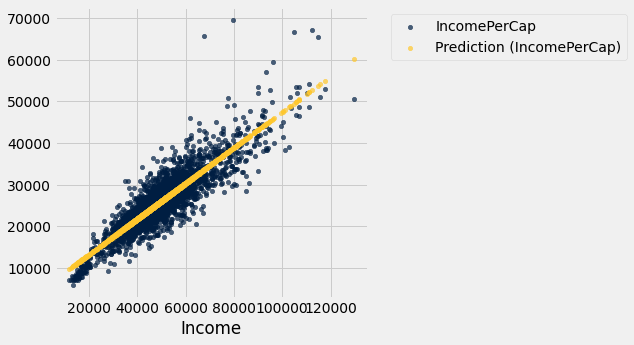

In [21]:
income_regression_dt = Table().with_columns(
    'Income',  census_dt.column('Income'), 
    'IncomePerCap', census_dt.column('IncomePerCap'),
    'Prediction (IncomePerCap)', predict(census_dt, 'Income', 'IncomePerCap')
)
income_regression_dt.scatter('Income')

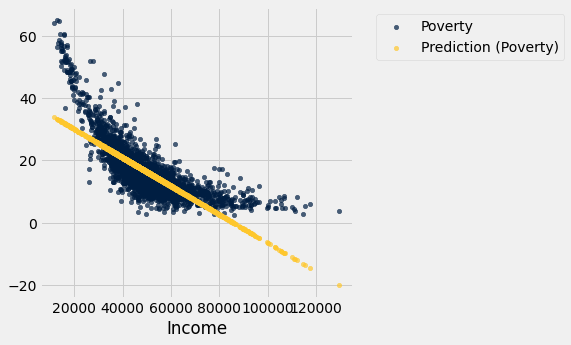

In [22]:
income_pov_regression_dt = Table().with_columns(
    'Income',  census_dt.column('Income'), 
    'Poverty', census_dt.column('Poverty'),
    'Prediction (Poverty)', predict(census_dt, 'Income', 'Poverty')
)
income_pov_regression_dt.scatter('Income')

### Polynomial Regression

In linear regression, we plot a straight line that minimizes the mean squared error of estimation among all the points.

**prediction(y)** = ax + b where a is slope and the b is the intersept.

This is a linear regression. However, this means that some points may be too far from the regression line.

**Polynomial Regression or Quadratic Regression** uses a quadratic function to minimize errors especially where the points don't cluster around a straight line.

f(x) = ax^2+bx+c, where a, b, and c are constants that define the polynomial curve.

No matter what the shape of the scatter plot, there is a unique line that minimizes the mean squared error of estimation. Basically this is a quadratic curve that fits the curve while minimizing the mean squared error.

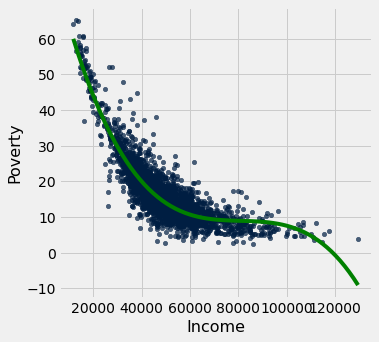

In [23]:
x = census_dt.column('Income')
y = census_dt.column('Poverty')

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(np.min(x).astype(int), np.max(x).astype(int), np.max(y).astype(int))

income_pov_regression_dt = Table().with_columns(
    'Income',  x, 
    'Poverty', y
)

income_pov_regression_dt.scatter('Income')
plt.plot(myline, mymodel(myline), color='green')

In [24]:
print(r2_score(y, mymodel(x)))

0.819477356196988


In [25]:
mymodel(82200)

8.89645935475643

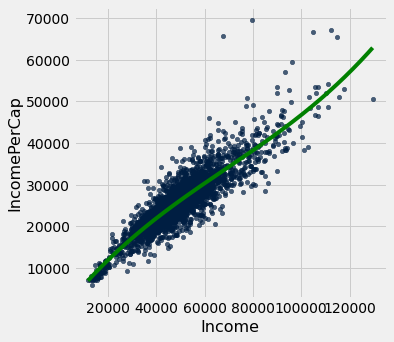

In [26]:
x = census_dt.column('Income')
y = census_dt.column('IncomePerCap')

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(np.min(x).astype(int), np.max(x).astype(int), np.max(y).astype(int))

income_pov_regression_dt = Table().with_columns(
    'Income',  x, 
    'IncomePerCap', y
)

income_pov_regression_dt.scatter('Income')
plt.plot(myline, mymodel(myline), color='green')

In [27]:
print(r2_score(y, mymodel(x)))

0.7953218918041366


In [28]:
mymodel(82200)

39116.513219639965

By: Surya Komandooru